# PSTAT 194 Final Project: Predicting Flight Delays
## Team: Walk in the Spark
* Andrew Zhang
* Wendy Gao
* Alex Wu
* Shon Inouye

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline  

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Import Data

In [2]:
flights = pd.read_csv("/mnt/data/flights.csv")
airlines = pd.read_csv("/mnt/data/airlines.csv", index_col = 0)
airports = pd.read_csv("/mnt/data/airports.csv", index_col = 0)
airport_table = pd.read_csv("/mnt/data/airport_codes_clean.csv")

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Viewing the format of the data

In [4]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
flights.shape

(5819079, 31)

In [5]:
airlines.head(5)

,AIRLINE
IATA_CODE,
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways


In [7]:
airlines.shape

(14, 1)

In [6]:
airports.head(5)

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [8]:
airports.shape

(322, 6)

In [7]:
airport_table.head()

,﻿Code,Airport Code
0,10001,01A
1,10003,03A
2,10004,04A
3,10005,05A
4,10006,06A


In [ ]:
# Fix month 10 airport codes for full dataset
oct_flightsFull = flights[flights.MONTH == 10].copy()
flights2 = flights[~flights["MONTH"].isin([10])]

oct_flightsFull["ORIGIN_AIRPORT"] = oct_flightsFull["ORIGIN_AIRPORT"].apply(pd.to_numeric)
oct_flightsFull["ORIGIN_AIRPORT"].replace(list(airport_table['Code']), list(airport_table['Airport Code']), inplace=True)
flights2 = flights2.append(oct_flightsFull)

In [9]:
# Checking the amount of missing values in dataset
flights2.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

# Exploratory Data Analysis and Visualizations

In [16]:
flightNA = flights.isnull().sum()

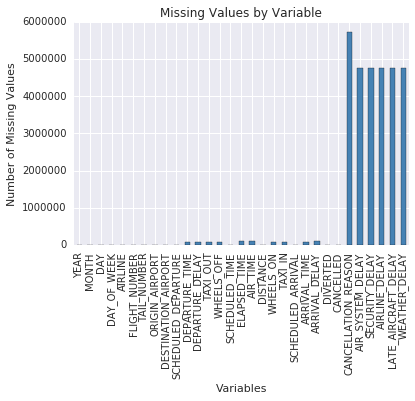

In [18]:
flightNA.plot('bar', color='steelblue')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.title("Missing Values by Variable")

In [5]:
# Create delay and no-delay datasets for visualizations
flightsDelays = flights[flights['DEPARTURE_DELAY'] > 0]
flightsNoDelays = flights[flights['DEPARTURE_DELAY'] <= 0]

(array([0, 1]), <a list of 2 Text xticklabel objects>)

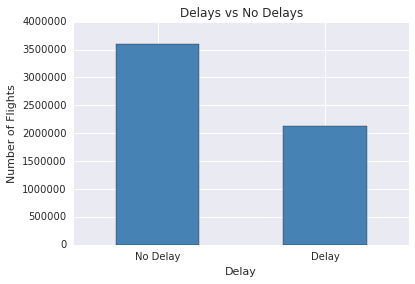

In [20]:
# Graph Delays vs No Delays
pd.Series(flights_agg['DELAY']).value_counts().plot('bar', color='steelblue')
plt.xlabel('Delay')
plt.ylabel("Number of Flights")
plt.title("Delays vs No Delays")
plt.xticks([0,1],['No Delay','Delay'])
plt.xticks(rotation=0)

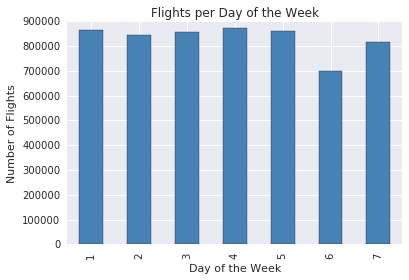

In [21]:
# Plot flights by day of the week 
col = [1,2,3,4,5,6,7]
pd.Series(flights['DAY_OF_WEEK']).value_counts().reindex(col).plot('bar', color='steelblue')
plt.xlabel('Day of the Week')
plt.ylabel("Number of Flights")
plt.title("Flights per Day of the Week")

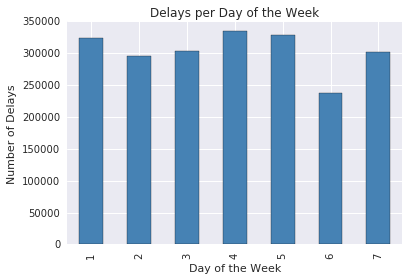

In [22]:
# Plot delays by day of the week 
pd.Series(flightsDelays['DAY_OF_WEEK']).value_counts().reindex(col).plot('bar', color='steelblue')
plt.xlabel('Day of the Week')
plt.ylabel("Number of Delays")
plt.title("Delays per Day of the Week")

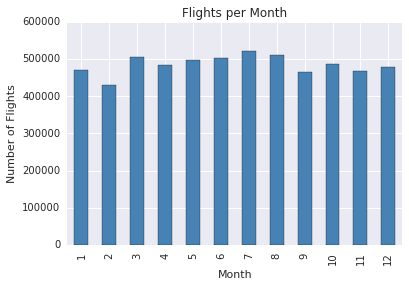

In [23]:
# Plot flights by month 
col = [1,2,3,4,5,6,7,8,9,10,11,12]
pd.Series(flights['MONTH']).value_counts().reindex(col).plot('bar', color='steelblue')
plt.xlabel('Month')
plt.ylabel("Number of Flights")
plt.title("Flights per Month")

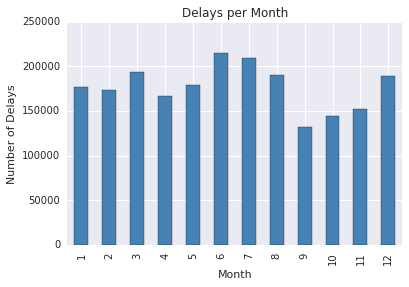

In [24]:
# Plot delays by month 
pd.Series(flightsDelays['MONTH']).value_counts().reindex(col).plot('bar', color='steelblue')
plt.xlabel('Month')
plt.ylabel("Number of Delays")
plt.title("Delays per Month")

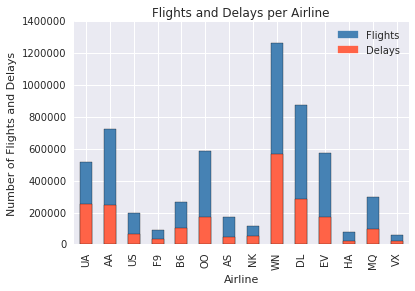

In [ ]:
#Plot of flights by airline and delays by airline
col= list(airlines.index)
pd.Series(flights['AIRLINE']).value_counts().reindex(col).plot('bar', color='steelblue')
pd.Series(flightsDelays['AIRLINE']).value_counts().reindex(col).plot('bar', color='tomato')
plt.xlabel('Airline')
plt.ylabel("Number of Flights and Delays")
plt.title("Flights and Delays per Airline")
red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[mpatches.Patch(color='steelblue', label='Flights'),
                   mpatches.Patch(color='tomato', label='Delays')])

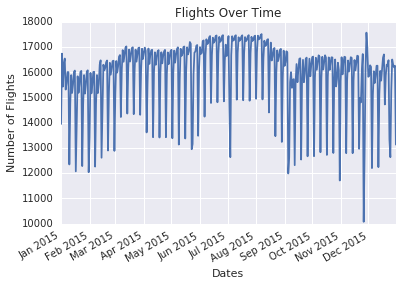

In [4]:
# Flights over time
flights = flights.assign(DATE=pd.to_datetime(flights[['YEAR','MONTH','DAY']]))

flights['DATE'].value_counts().plot()
plt.xlabel('Dates')
plt.ylabel("Number of Flights")
plt.title("Flights Over Time")

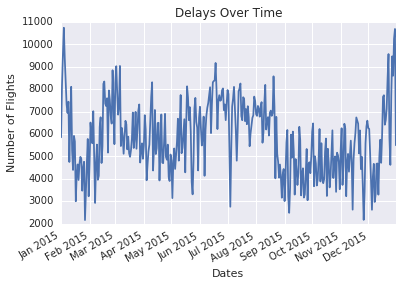

In [6]:
# Delays over time
flightsD = flightsDelays.assign(DATE=pd.to_datetime(flightsDelays[['YEAR','MONTH','DAY']]))

flightsD['DATE'].value_counts().plot()
plt.xlabel('Dates')
plt.ylabel("Number of Flights")
plt.title("Delays Over Time")